In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic

In [17]:
data = pd.read_excel('business_vancouver.xlsx')

In [18]:
# Afficher un aperçu des données pour vérifier la structure après le chargement
data.head()


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,...,attributes_BYOB,attributes_CoatCheck,attributes_Smoking,attributes_DriveThru,attributes_BYOBCorkage,attributes_Corkage,attributes_RestaurantsCounterService,attributes_AgesAllowed,attributes_DietaryRestrictions,attributes_Open24Hours
0,0,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AvT2mGkdYwU0ghqDfs-OlQ,Tire Town Auto Service,2032 Hastings Street E,Vancouver,BC,V5L 1T8,49.281059,-123.063019,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Yyym58vWvlRPuMCOICWRBw,Shirley's Tape And Shears,102 E 9th St,Vancouver,WA,98660,45.628235,-122.671251,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0b9OJG4DWUqhdLotm_La7Q,Mid Century Modern Home,1041 Kingsway,Vancouver,BC,V5V 3C7,49.253741,-123.082838,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Xg12RikHzyFCgFBApWtcdw,The Golden Dog,"1217 NE 99th St, Ste 107",Vancouver,WA,98665,45.692591,-122.658644,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exercice 1

In [19]:
# Filtrer uniquement les entreprises ayant "Restaurant" dans la colonne categories
df_restaurants = data[
    data['categories'].str.contains('Restaurant', na=False)
]

# Vérifier le nombre de restaurants après filtrage
len(df_restaurants), df_restaurants.head()


(5501,
     Unnamed: 0             business_id  \
 0            0  D4JtQNTI4X3KcbzacDJsMw   
 6            6  Mf9io8WkMyGautXuSSfGTg   
 11          11  jfDfHzAq6iKkRnzzZ4n1nQ   
 13          13  JeU01XydOJZBWAnlqHwP7w   
 14          14  OfA_4cHgvlknHMcn0qNs2w   
 
                                       name                        address  \
 0                      Bob Likes Thai Food                   3755 Main St   
 6   Los Potrillos Mexican Restaurant & Bar         10722 NW Lakeshore Ave   
 11             Let's Roll Custom Sushi Bar  1184 Denman Street, Suite 104   
 13      Bawarchi Tikka Kabob & Curry House          11115 NE 4th Plain Rd   
 14                          Little Caesars               7010 Kerr Street   
 
          city state postal_code   latitude   longitude  stars  ...  \
 0   Vancouver    BC         V5V  49.251342 -123.101333    3.5  ...   
 6   Vancouver    WA       98685  45.698889 -122.703543    3.5  ...   
 11  Vancouver    BC     V6G 2M9  49.286360 -123.1

In [20]:
hours_columns = [
    "hours_Monday", "hours_Tuesday", "hours_Wednesday",
    "hours_Thursday", "hours_Friday", "hours_Saturday", "hours_Sunday"
]

# Fonction pour calculer la durée d'ouverture à partir des plages horaires (ex: '08:00-22:00')
def calculate_duration(hours_range):
    if pd.isna(hours_range):  # Vérifier si la valeur est manquante
        return 0
    try:
        start, end = hours_range.split('-')
        start_time = pd.to_datetime(start, format='%H:%M')
        end_time = pd.to_datetime(end, format='%H:%M')
        duration = (end_time - start_time).seconds / 3600  # Durée en heures
        return duration if duration > 0 else duration + 24  # Gérer les plages traversant minuit
    except Exception:
        return 0  # Retourner 0 en cas d'erreur

# Appliquer la transformation pour chaque colonne horaire
for column in hours_columns:
    df_restaurants[f"{column}_duration"] = df_restaurants[column].apply(calculate_duration)

# Examiner les colonnes horaires après transformation
df_restaurants[[f"{col}_duration" for col in hours_columns]].head()


C:\Users\kilia\AppData\Local\Temp\ipykernel_15288\1960913986.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants[f"{column}_duration"] = df_restaurants[column].apply(calculate_duration)
C:\Users\kilia\AppData\Local\Temp\ipykernel_15288\1960913986.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants[f"{column}_duration"] = df_restaurants[column].apply(calculate_duration)
C:\Users\kilia\AppData\Local\Temp\ipykernel_15288\1960913986.py:21: SettingWithCopyWarning: 
A value is tryi

,hours_Monday_duration,hours_Tuesday_duration,hours_Wednesday_duration,hours_Thursday_duration,hours_Friday_duration,hours_Saturday_duration,hours_Sunday_duration
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
6,24.0,10.0,10.0,10.0,10.0,10.0,10.0
11,11.0,11.0,11.0,11.0,11.0,11.0,11.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,12.0,12.0,12.0,12.0,12.0,12.0,12.0


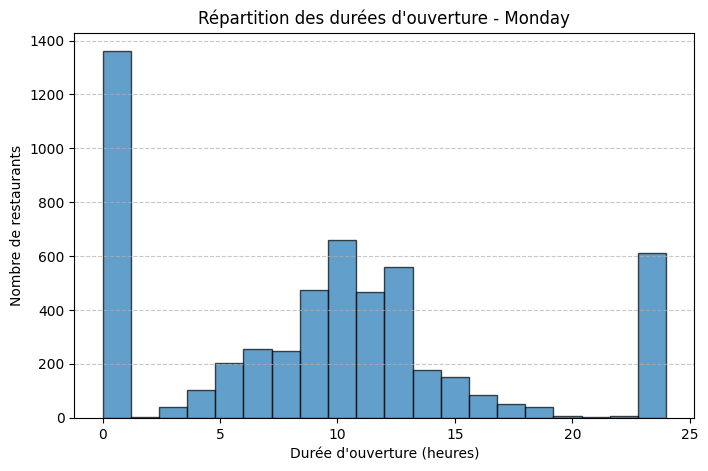

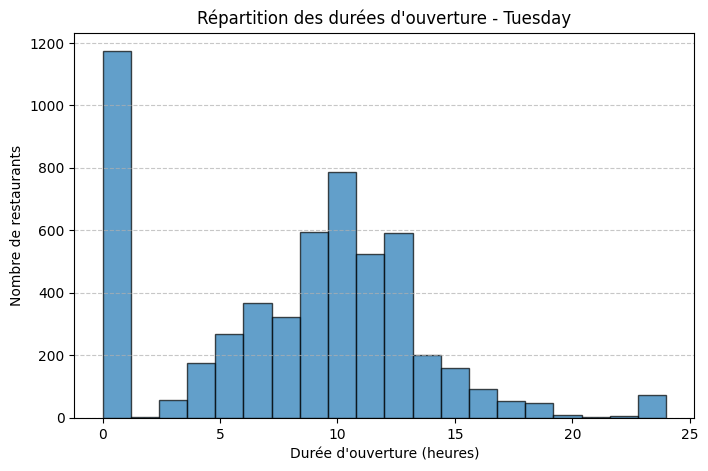

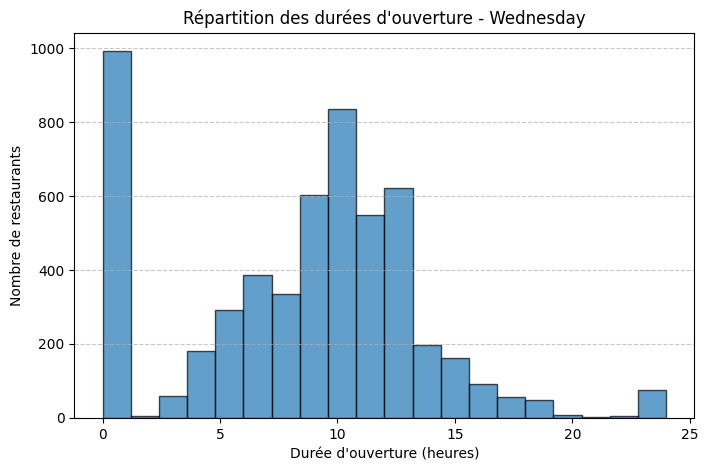

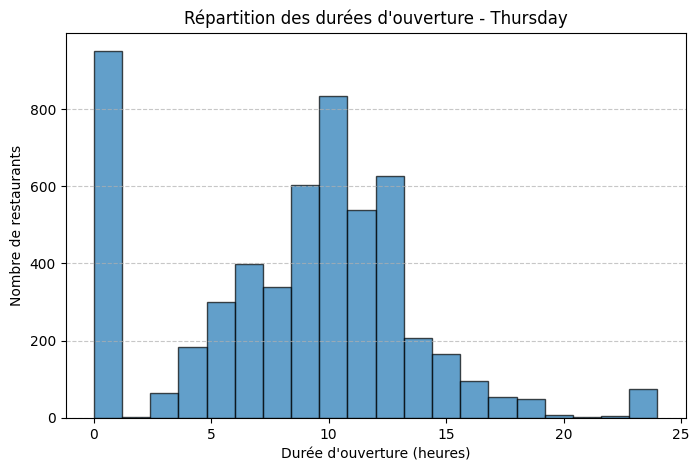

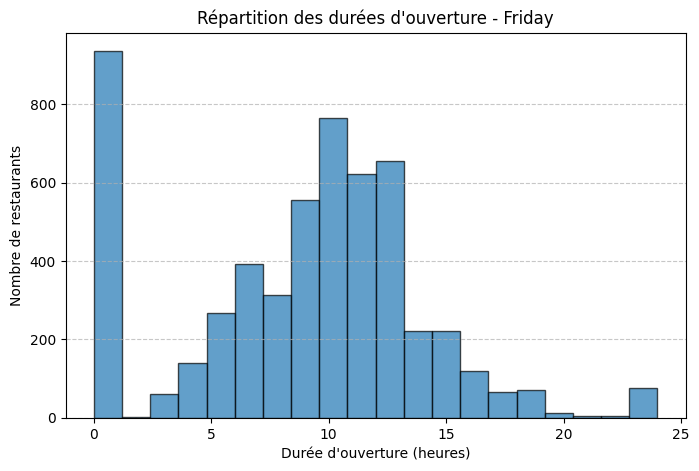

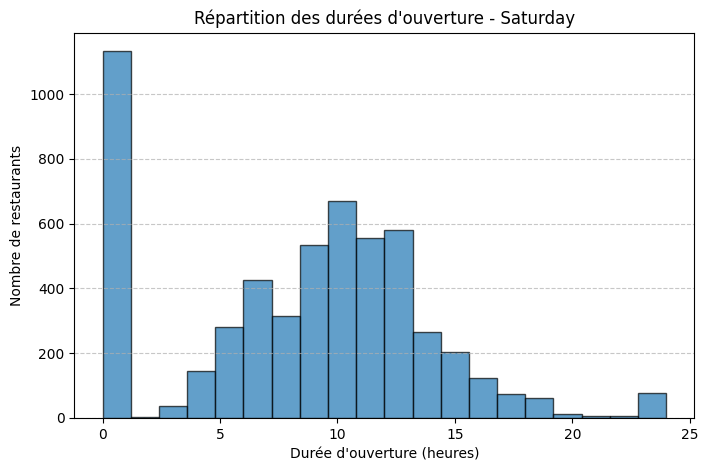

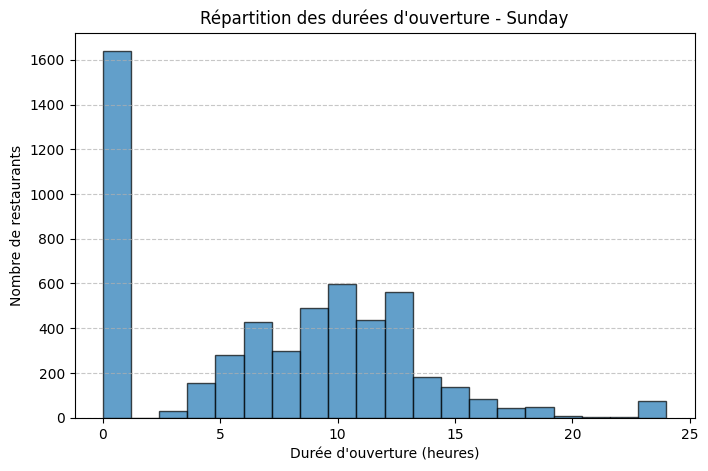

In [21]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Tracer la répartition pour chaque jour de la semaine
for day in days:
    column = f"hours_{day}_duration"
    plt.figure(figsize=(8, 5))
    plt.hist(df_restaurants[column], bins=20, alpha=0.7, edgecolor='black')
    plt.title(f"Répartition des durées d'ouverture - {day}")
    plt.xlabel("Durée d'ouverture (heures)")
    plt.ylabel("Nombre de restaurants")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# Exercice 2

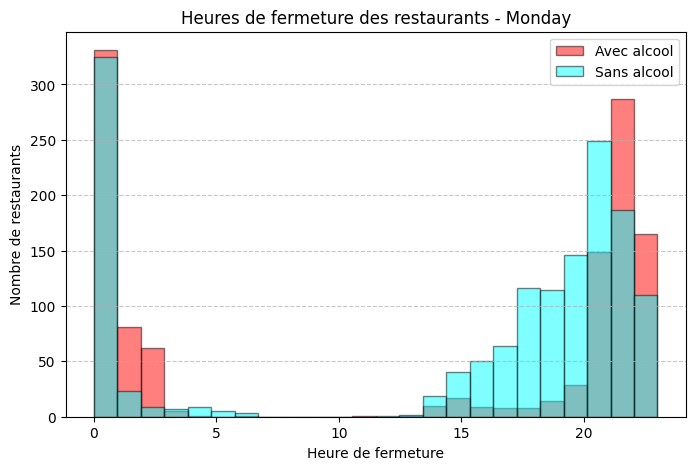

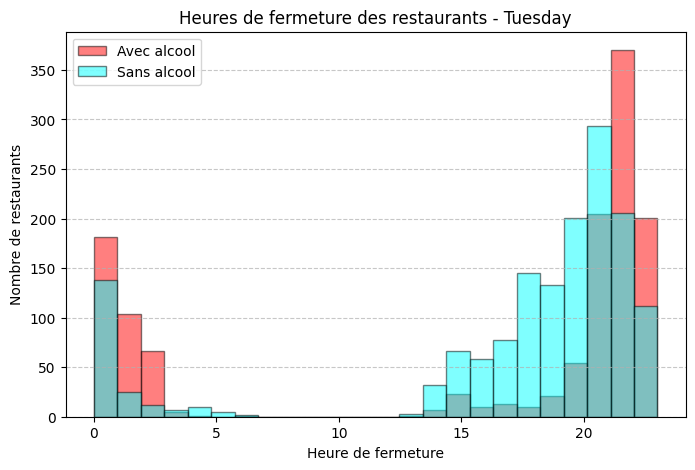

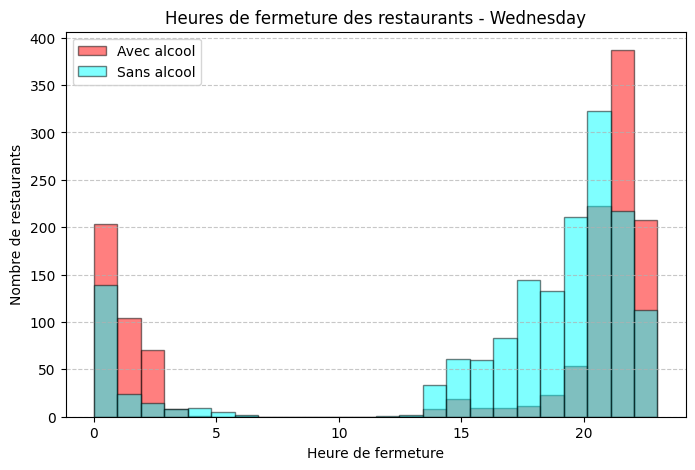

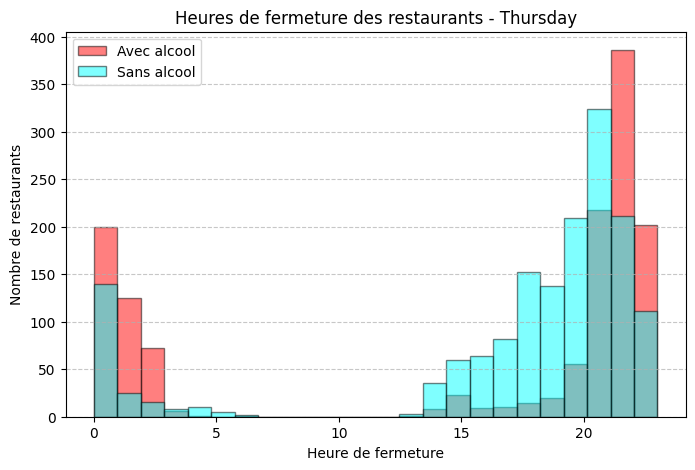

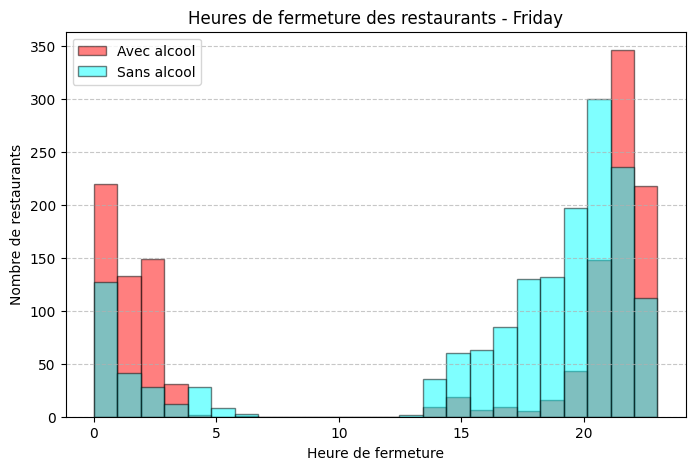

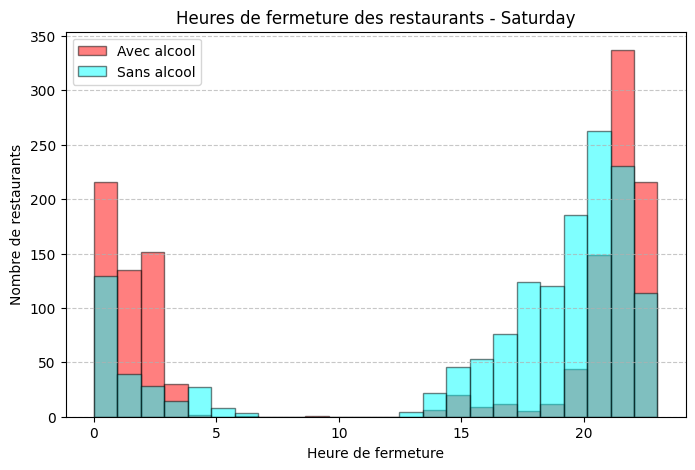

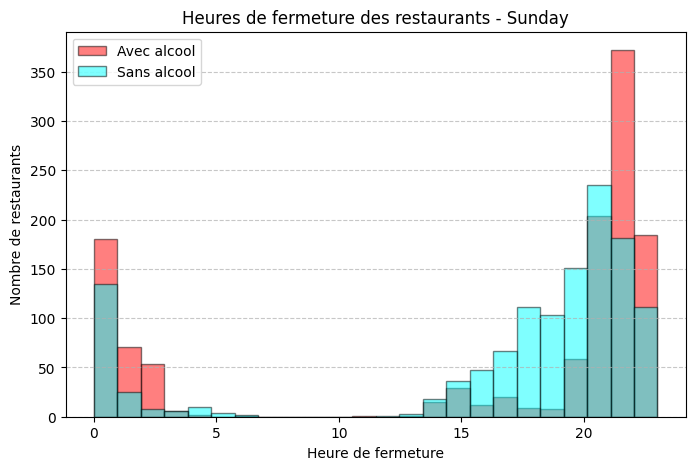

In [22]:
# Filtrer les restaurants en fonction de l'attribut 'Alcohol'
with_alcohol = df_restaurants[
    df_restaurants['attributes_Alcohol'].str.contains('full_bar', na=False)
]
without_alcohol = df_restaurants[
    df_restaurants['attributes_Alcohol'].str.contains('none', na=False)
]

# Extraire les heures de fermeture pour chaque jour
closing_hours = {}
for day in days:
    column = f"hours_{day}"
    closing_hours[f"{day}_with_alcohol"] = with_alcohol[column].dropna().apply(
        lambda x: int(x.split('-')[1].split(':')[0]) if '-' in x else None
    )
    closing_hours[f"{day}_without_alcohol"] = without_alcohol[column].dropna().apply(
        lambda x: int(x.split('-')[1].split(':')[0]) if '-' in x else None
    )

# Tracer les comparaisons pour chaque jour
for day in days:
    plt.figure(figsize=(8, 5))
    plt.hist(closing_hours[f"{day}_with_alcohol"], bins=24, alpha=0.5, label="Avec alcool", edgecolor='black',color = 'red')
    plt.hist(closing_hours[f"{day}_without_alcohol"], bins=24, alpha=0.5, label="Sans alcool", edgecolor='black',color = "cyan")
    plt.title(f"Heures de fermeture des restaurants - {day}")
    plt.xlabel("Heure de fermeture")
    plt.ylabel("Nombre de restaurants")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# Exercice 3

In [23]:
# Filtrer les données pour ne conserver que les restaurants à Vancouver, BC
restaurants_vancouver = data[(data['city'] == 'Vancouver') & (data['state'] == 'BC')]

# Vérifier le nombre de restaurants et un aperçu des données filtrées
restaurants_vancouver.shape, restaurants_vancouver.head()

((10299, 59),
    Unnamed: 0             business_id                          name  \
 0           0  D4JtQNTI4X3KcbzacDJsMw           Bob Likes Thai Food   
 1           1  AvT2mGkdYwU0ghqDfs-OlQ        Tire Town Auto Service   
 3           3  0b9OJG4DWUqhdLotm_La7Q       Mid Century Modern Home   
 5           5  iX6_gILIkLUpO1r1BzwfvA                  Park Theatre   
 7           7  zml5p2_hrHNDumKqsWGvfA  Community Thrift and Vintage   
 
                   address       city state postal_code   latitude   longitude  \
 0            3755 Main St  Vancouver    BC         V5V  49.251342 -123.101333   
 1  2032 Hastings Street E  Vancouver    BC     V5L 1T8  49.281059 -123.063019   
 3           1041 Kingsway  Vancouver    BC     V5V 3C7  49.253741 -123.082838   
 5      3440 Cambie Street  Vancouver    BC     V5Z 2W8  49.254479 -123.114869   
 7      311 Carrall Street  Vancouver    BC     V6B 2J4  49.282218 -123.104458   
 
    stars  ...  attributes_BYOB  attributes_CoatCheck attr

In [24]:
# Calcul des coordonnées moyennes pour le centre de Vancouver
center_lat = restaurants_vancouver['latitude'].mean()
center_lon = restaurants_vancouver['longitude'].mean()
center_coordinates = (center_lat, center_lon)

center_coordinates

(np.float64(49.26680566584028), np.float64(-123.11652409771669))

In [25]:
# Calculer la distance de chaque restaurant par rapport au centre
restaurants_vancouver['distance_to_center'] = restaurants_vancouver.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), center_coordinates).kilometers, axis=1
)

# Afficher un aperçu des distances calculées
restaurants_vancouver[['name', 'distance_to_center']].head()

C:\Users\kilia\AppData\Local\Temp\ipykernel_15288\3424169739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_vancouver['distance_to_center'] = restaurants_vancouver.apply(


,name,distance_to_center
0,Bob Likes Thai Food,2.044581
1,Tire Town Auto Service,4.203842
3,Mid Century Modern Home,2.850113
5,Park Theatre,1.376145
7,Community Thrift and Vintage,1.925868


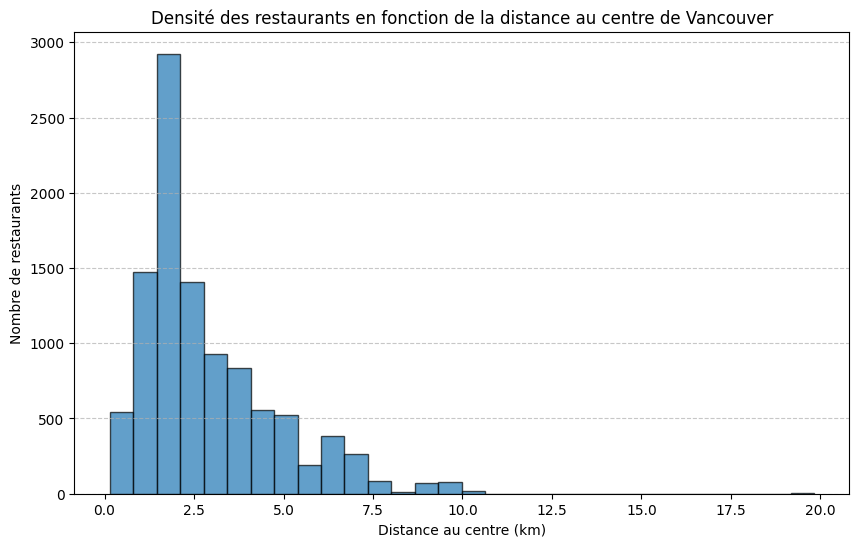

In [26]:
# Construire un histogramme des distances au centre
plt.figure(figsize=(10, 6))
plt.hist(restaurants_vancouver['distance_to_center'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Densité des restaurants en fonction de la distance au centre de Vancouver')
plt.xlabel('Distance au centre (km)')
plt.ylabel('Nombre de restaurants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [27]:
# Examiner les colonnes pour identifier celles liées aux horaires
restaurants_vancouver.columns[restaurants_vancouver.columns.str.contains('hours|time', case=False)]

Index(['hours_Monday', 'hours_Tuesday', 'hours_Wednesday', 'hours_Thursday',
       'hours_Friday', 'hours_Saturday', 'hours_Sunday',
       'attributes_Open24Hours'],
      dtype='object')

In [28]:
# Extraire les heures d'ouverture et de fermeture pour le lundi
restaurants_vancouver['closing_time_monday'] = restaurants_vancouver['hours_Monday'].str.extract(r'-(\d{1,2}:\d{2})')[0]

# Convertir les heures de fermeture en format datetime pour le traitement
restaurants_vancouver['closing_time_monday'] = pd.to_datetime(
    restaurants_vancouver['closing_time_monday'], format='%H:%M', errors='coerce'
)

# Ajouter une colonne pour l'heure en format numérique (heures décimales)
restaurants_vancouver['closing_hour_monday'] = restaurants_vancouver['closing_time_monday'].dt.hour + (
    restaurants_vancouver['closing_time_monday'].dt.minute / 60)

# Vérifier un aperçu des données traitées
restaurants_vancouver[['name', 'closing_time_monday', 'closing_hour_monday', 'distance_to_center']].head()


C:\Users\kilia\AppData\Local\Temp\ipykernel_15288\3101889455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_vancouver['closing_time_monday'] = restaurants_vancouver['hours_Monday'].str.extract(r'-(\d{1,2}:\d{2})')[0]
C:\Users\kilia\AppData\Local\Temp\ipykernel_15288\3101889455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_vancouver['closing_time_monday'] = pd.to_datetime(
C:\Users\kilia\AppData\Local\Temp\ipykernel_15288\3101889455.py:10: SettingWithCopyWarning: 
A value i

,name,closing_time_monday,closing_hour_monday,distance_to_center
0,Bob Likes Thai Food,NaT,NaN,2.044581
1,Tire Town Auto Service,1900-01-01 17:30:00,17.5,4.203842
3,Mid Century Modern Home,NaT,NaN,2.850113
5,Park Theatre,NaT,NaN,1.376145
7,Community Thrift and Vintage,NaT,NaN,1.925868


In [ ]:
import numpy as np

# Définir les coordonnées approximatives du centre de Vancouver
vancouver_center = {'latitude': 49.2827, 'longitude': -123.1207}

# Filtrer les restaurants situés à Vancouver (BC, Canada)
restaurants_vancouver = df_rest[(df['city'] == 'Vancouver') & (df['state'] == 'BC')]

# Fonction pour calculer la distance géographique (Haversine)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Rayon de la Terre en kilomètres
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calculer la distance au centre pour chaque restaurant
restaurants_vancouver['distance_to_center'] = restaurants_vancouver.apply(
    lambda row: haversine(row['latitude'], row['longitude'], vancouver_center['latitude'], vancouver_center['longitude']),
    axis=1
)

# Histogramme de densité des restaurants en fonction de la distance
density_histogram = restaurants_vancouver['distance_to_center'].plot.hist(bins=30, alpha=0.7, title="Densité des restaurants en fonction de la distance au centre")

density_histogram.figure


NameError: name 'df' is not defined